<font size=3 color='orange'>Machine Failure Prediction EDA

The data is downloaded from kaggle. There is no specific info provided about what each column represents in the data, but based on observation we have to predict wether a machine will fail tommorow or not

Importing Libraries

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['patch.force_edgecolor']=True
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
import math

In [262]:
data = pd.read_csv("machine_failure_data.csv")
data.head()

,Date,Location,Min_Temp,Max_Temp,Leakage,Evaporation,Electricity,Parameter1_Dir,Parameter1_Speed,Parameter2_9am,...,Parameter4_3pm,Parameter5_9am,Parameter5_3pm,Parameter6_9am,Parameter6_3pm,Parameter7_9am,Parameter7_3pm,Failure_today,RISK_MM,Fail_tomorrow
0,2008-12-01,3,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,3,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,3,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,3,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [263]:
print("total data points in the data are:", data.shape[0])
print("total columns in the data are:", data.shape[1])

total data points in the data are: 142193
total columns in the data are: 24


In [264]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              142193 non-null  object 
 1   Location          142193 non-null  int64  
 2   Min_Temp          141556 non-null  float64
 3   Max_Temp          141871 non-null  float64
 4   Leakage           140787 non-null  float64
 5   Evaporation       81350 non-null   float64
 6   Electricity       74377 non-null   float64
 7   Parameter1_Dir    132863 non-null  object 
 8   Parameter1_Speed  132923 non-null  float64
 9   Parameter2_9am    132180 non-null  object 
 10  Parameter2_3pm    138415 non-null  object 
 11  Parameter3_9am    140845 non-null  float64
 12  Parameter3_3pm    139563 non-null  float64
 13  Parameter4_9am    140419 non-null  float64
 14  Parameter4_3pm    138583 non-null  float64
 15  Parameter5_9am    128179 non-null  float64
 16  Parameter5_3pm    12

<AxesSubplot:>

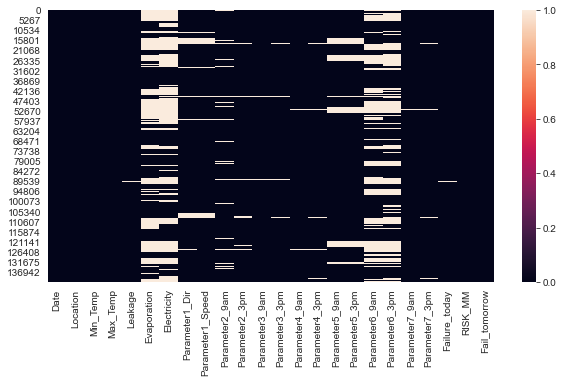

In [265]:
#plot to show the missing values
plt.figure(figsize=(10,5))
sns.heatmap(data.isna())

**We have missing values in the data**

Checking the balance in the data

<AxesSubplot:xlabel='Fail_tomorrow', ylabel='count'>

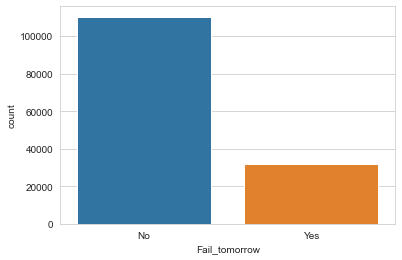

In [266]:
sns.countplot(x='Fail_tomorrow', data=data)

**data is highly imbalaned**

<font size=2.5 color='blue'>Dealing with missing values

In [267]:
#getting all the columns with missing values into a list
columns_nan = list(data.columns[data.isnull().any()])
print("Number of columns with missing values are: ",len(columns_nan))
print(columns_nan)

Number of columns with missing values are:  20
['Min_Temp', 'Max_Temp', 'Leakage', 'Evaporation', 'Electricity', 'Parameter1_Dir', 'Parameter1_Speed', 'Parameter2_9am', 'Parameter2_3pm', 'Parameter3_9am', 'Parameter3_3pm', 'Parameter4_9am', 'Parameter4_3pm', 'Parameter5_9am', 'Parameter5_3pm', 'Parameter6_9am', 'Parameter6_3pm', 'Parameter7_9am', 'Parameter7_3pm', 'Failure_today']


In [268]:
#getting percentage of mssing values in each column
column_nan35 = []
for column in columns_nan:
    missing = sum(data[column].isna())
    print("The Missing values for {0} feature is: {1}%".format(column, round((missing/data.shape[0])*100,2)))
    if round((missing/data.shape[0])*100,2)>35:
        column_nan35.append(column)

The Missing values for Min_Temp feature is: 0.45%
The Missing values for Max_Temp feature is: 0.23%
The Missing values for Leakage feature is: 0.99%
The Missing values for Evaporation feature is: 42.79%
The Missing values for Electricity feature is: 47.69%
The Missing values for Parameter1_Dir feature is: 6.56%
The Missing values for Parameter1_Speed feature is: 6.52%
The Missing values for Parameter2_9am feature is: 7.04%
The Missing values for Parameter2_3pm feature is: 2.66%
The Missing values for Parameter3_9am feature is: 0.95%
The Missing values for Parameter3_3pm feature is: 1.85%
The Missing values for Parameter4_9am feature is: 1.25%
The Missing values for Parameter4_3pm feature is: 2.54%
The Missing values for Parameter5_9am feature is: 9.86%
The Missing values for Parameter5_3pm feature is: 9.83%
The Missing values for Parameter6_9am feature is: 37.74%
The Missing values for Parameter6_3pm feature is: 40.15%
The Missing values for Parameter7_9am feature is: 0.64%
The Missing

**Observation:**
1. Some features has missing information of more than 35% so it might be good consider it as a separate category
2. Those features are 'Evaporation', 'Electricity', 'parameter6_9am', 'paramter6_3pm'

Converting those features into categorial features

In [269]:
#function to encod missing and non missing values
def convert_category(value):
    if math.isnan(value):
        return 0
    else:
        return 1

In [270]:
#converting those columns
for column in column_nan35:
    data[column] = data[column].apply(lambda x: convert_category(x))
    columns_nan.remove(column)

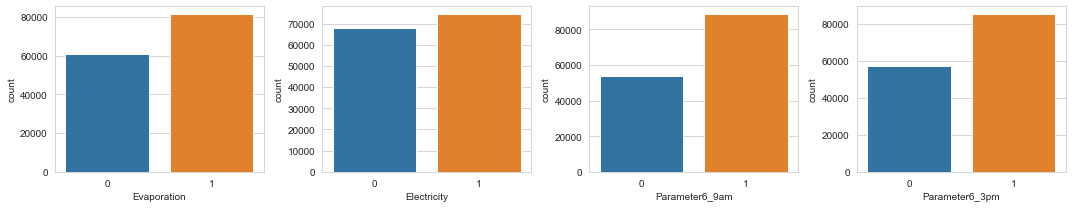

In [271]:
#cheacking if it's worked
fig, axes = plt.subplots(1,4)
fig.set_figheight(3)
fig.set_figwidth(15)

for ax, col in zip(axes.flatten(), column_nan35):
    sns.countplot(ax=ax, data=data, x=col)
    plt.tight_layout()

for remaining 20 columns we'll replace with
1. median if numerical
2. largest category if categorical

In [272]:
all_numeric_column = list(data.select_dtypes(include='number').columns)
for column in columns_nan:
    if column in all_numeric_column:
        med = data[column].median()
        data[column] = data[column].apply(lambda x : med if(math.isnan(x)) else x)
    else:
        high_categ = data[column].value_counts().index[0]
        data[column] = data[column].apply(lambda x : high_categ if(type(x)==np.float) else x)

In [273]:
#checking if it's worked
for column in columns_nan:
    missing = sum(data[column].isna())
    print("The Missing values for {0} feature is: {1}%".format(column, round((missing/data.shape[0])*100,2)))

The Missing values for Min_Temp feature is: 0.0%
The Missing values for Max_Temp feature is: 0.0%
The Missing values for Leakage feature is: 0.0%
The Missing values for Parameter1_Dir feature is: 0.0%
The Missing values for Parameter1_Speed feature is: 0.0%
The Missing values for Parameter2_9am feature is: 0.0%
The Missing values for Parameter2_3pm feature is: 0.0%
The Missing values for Parameter3_9am feature is: 0.0%
The Missing values for Parameter3_3pm feature is: 0.0%
The Missing values for Parameter4_9am feature is: 0.0%
The Missing values for Parameter4_3pm feature is: 0.0%
The Missing values for Parameter5_9am feature is: 0.0%
The Missing values for Parameter5_3pm feature is: 0.0%
The Missing values for Parameter7_9am feature is: 0.0%
The Missing values for Parameter7_3pm feature is: 0.0%
The Missing values for Failure_today feature is: 0.0%


<AxesSubplot:>

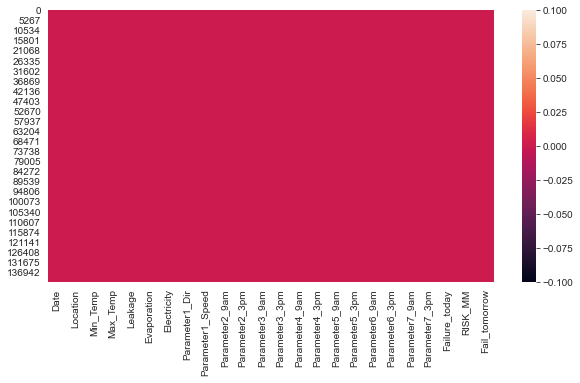

In [274]:
#plot to show the missing values
plt.figure(figsize=(10,5))
sns.heatmap(data.isna())

**There are no missing values in the data**

Encoding yes or no into 1 or 0 for falure features

In [275]:
data['Failure_today'] = data['Failure_today'].apply(lambda x: 0 if(x=='No') else 1)
data['Fail_tomorrow'] = data['Fail_tomorrow'].apply(lambda x: 0 if(x=='No') else 1)

In [276]:
data['Fail_tomorrow'].value_counts()

0    110316
1     31877
Name: Fail_tomorrow, dtype: int64

<font size=2 color='blue'>Checking correlation between features

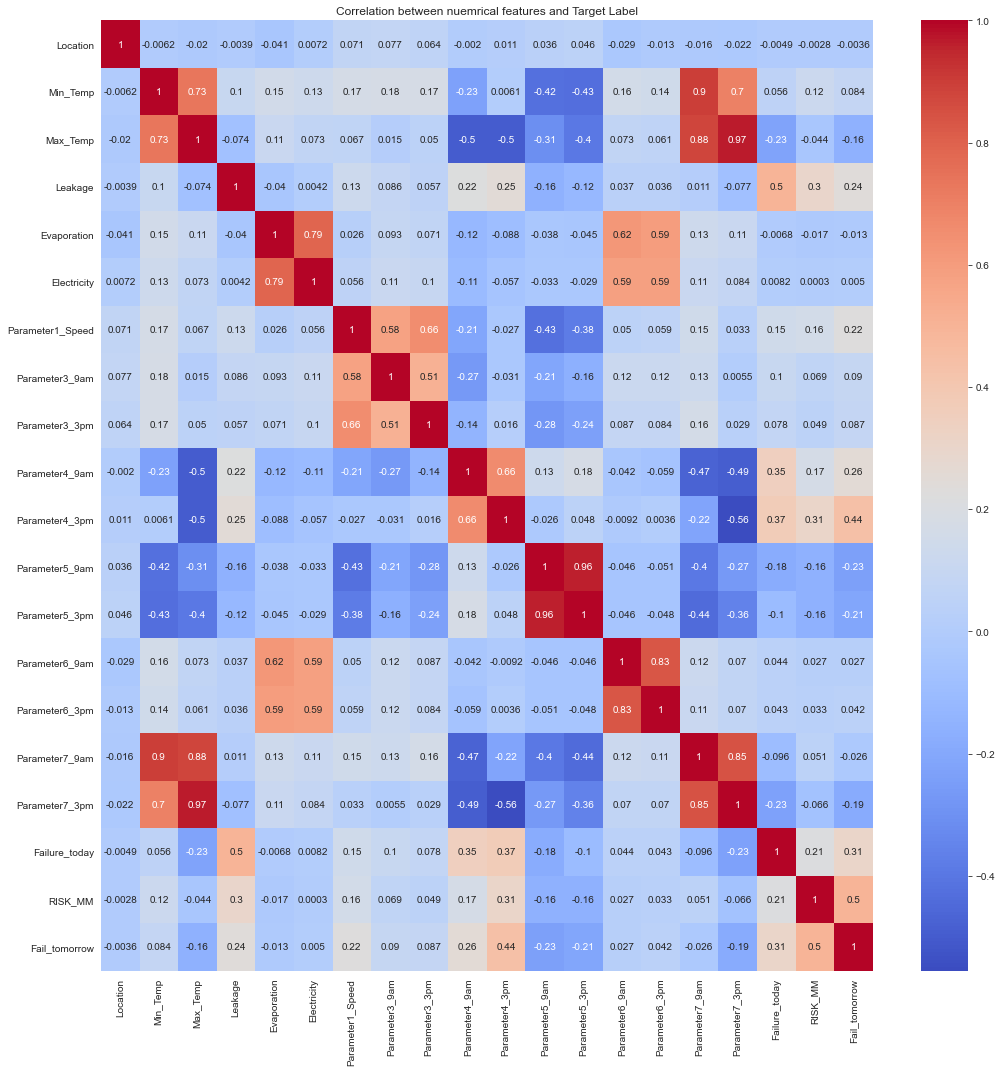

In [277]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between nuemrical features and Target Label")
plt.tight_layout()

**Features min_temp and max_temp are highly correlated**

to overcome this we create a new feature using these and drop them

In [278]:
data['Avg_temp'] = (data['Min_Temp']+data['Max_Temp'])/2
data.drop(['Min_Temp', 'Max_Temp'], axis=1, inplace=True)

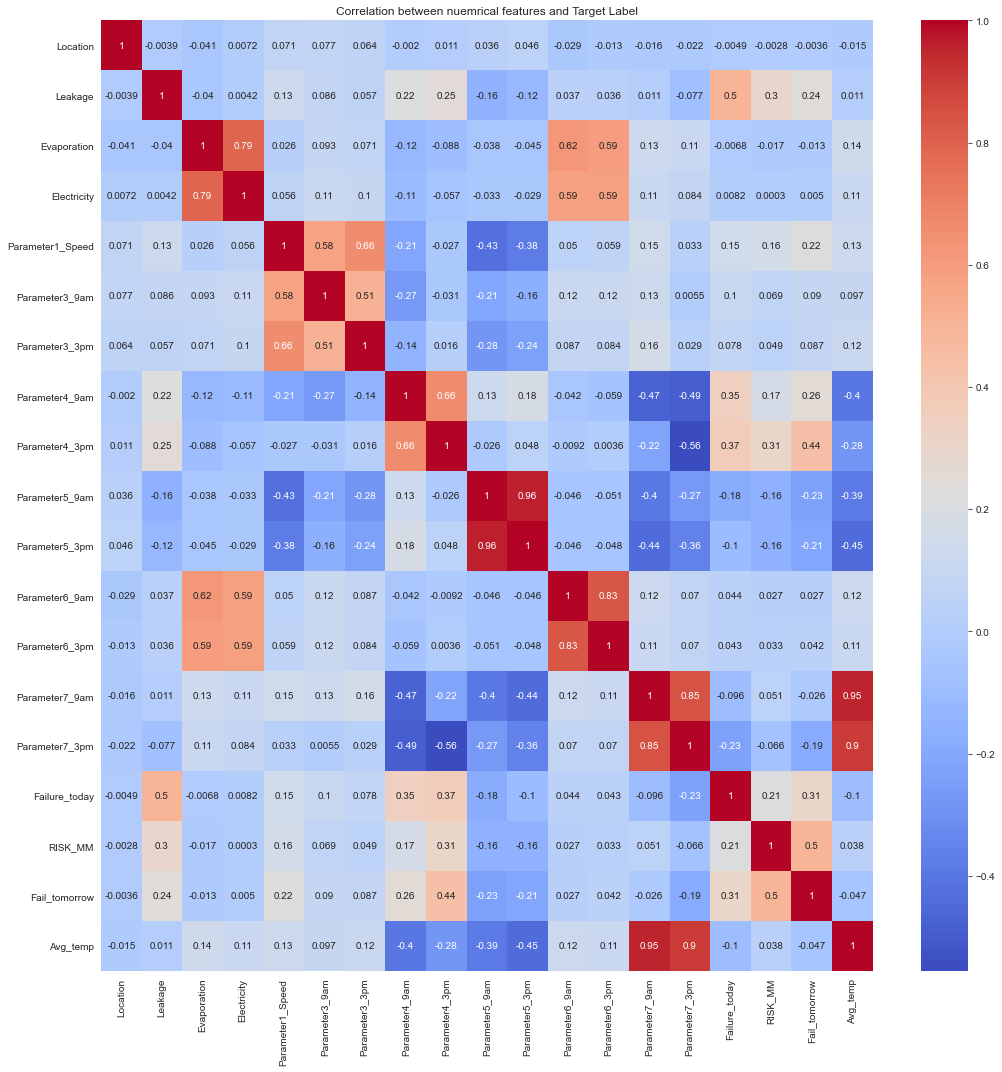

In [279]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between nuemrical features and Target Label")
plt.tight_layout()

For most of the parameters there is high correlaction between 9am and 3pm features

In [280]:
data['parameter3'] = data["Parameter3_9am"]+data['Parameter3_3pm']
data.drop(['Parameter3_9am', "Parameter3_3pm"], axis=1, inplace=True)

data['parameter4'] = data["Parameter4_9am"]+data['Parameter4_3pm']
data.drop(['Parameter4_9am', "Parameter4_3pm"], axis=1, inplace=True)

data['parameter5'] = data["Parameter5_9am"]+data['Parameter5_3pm']
data.drop(['Parameter5_9am', "Parameter5_3pm"], axis=1, inplace=True)

data['parameter6'] = data["Parameter6_9am"]+data['Parameter6_3pm']
data.drop(['Parameter6_9am', "Parameter6_3pm"], axis=1, inplace=True)

data['parameter7'] = data["Parameter7_9am"]+data['Parameter7_3pm']
data.drop(['Parameter7_9am', "Parameter7_3pm"], axis=1, inplace=True)

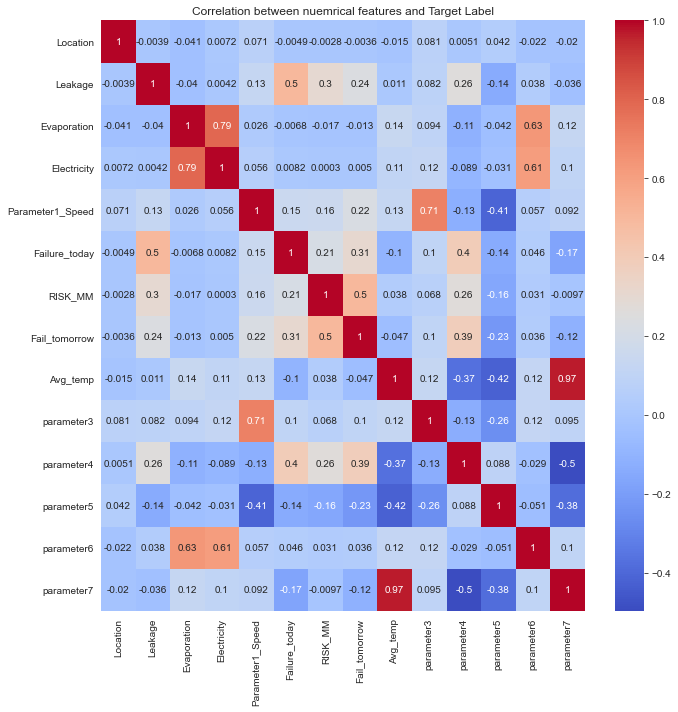

In [281]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between nuemrical features and Target Label")
plt.tight_layout()

Features location, evaporatio, avg_temp are not correlated with target variable

In [282]:
#droppig these features
data.drop(['Location','Evaporation','Electricity','parameter3','parameter6','Avg_temp'], axis=1, inplace=True)

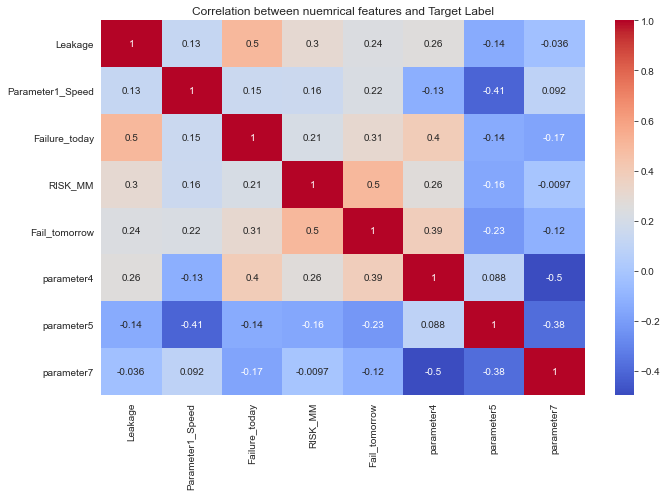

In [283]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between nuemrical features and Target Label")
plt.tight_layout()

<font size=2, color='blue'>Categorical features

In [284]:
data.select_dtypes(include='object')

,Date,Parameter1_Dir,Parameter2_9am,Parameter2_3pm
0,2008-12-01,W,W,WNW
1,2008-12-02,WNW,NNW,WSW
2,2008-12-03,WSW,W,WSW
3,2008-12-04,NE,SE,E
4,2008-12-05,W,ENE,NW
...,...,...,...,...
142188,2017-06-20,E,ESE,E
142189,2017-06-21,E,SE,ENE
142190,2017-06-22,NNW,SE,N
142191,2017-06-23,N,SE,WNW


In [285]:
#dropping date column
data['date'] = pd.to_datetime(data['Date'])
data.drop('Date', axis=1, inplace=True)

In [286]:
data['date'] = data['date'].apply(lambda x : x.year)

In [287]:
data.head()

,Leakage,Parameter1_Dir,Parameter1_Speed,Parameter2_9am,Parameter2_3pm,Failure_today,RISK_MM,Fail_tomorrow,parameter4,parameter5,parameter7,date
0,0.6,W,44.0,W,WNW,0,0.0,0,93.0,2014.8,38.7,2008
1,0.0,WNW,44.0,NNW,WSW,0,0.0,0,69.0,2018.4,41.5,2008
2,0.0,WSW,46.0,W,WSW,0,0.0,0,68.0,2016.3,44.2,2008
3,0.0,NE,24.0,SE,E,0,1.0,0,61.0,2030.4,44.6,2008
4,1.0,W,41.0,ENE,NW,0,0.2,0,115.0,2016.8,47.5,2008


In [288]:
data.shape

(142193, 12)

Saving the daframe to a csv file

In [260]:
data.to_csv('Cleaned_data.csv', index=False)